<a href="https://colab.research.google.com/github/rajshekharsingh66/Capstone_project1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note :- Since github is not able to show all the visualisations present in the code I would request you to open it in colab and load the global terrorism dataset, so you can go through this project.

# **Project Name**    -  Exploratory Data Analysis on dataset Global Terrorism



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member  -** Raj shekhar singh


# **Project Summary -**

Our project delves into the intricate realm of global terrorism, aiming to extract meaningful insights from a comprehensive dataset. This dataset serves as a crucial repository of information, shedding light on the multifaceted nature of terrorist activities worldwide. To embark on this analytical journey, we first navigate through the basics: understanding what this dataset encapsulates and the tools required for our analysis.

1. What this dataset is all about?
The dataset encompasses a wide array of information, detailing terrorist incidents globally. It spans several years and provides data on the motives, methods, and impact of these activities, offering a nuanced understanding of the global terrorism landscape.

2. Installation of Libraries and Dataset
Our analysis hinges on the power of Python's data analysis stack, employing libraries such as Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for visualizations. Additionally, we utilize the 'os' library for efficient file handling. Importantly, we load and preprocess the dataset to make it amenable to our analytical techniques.

3. Basic Analysis
We kick off our exploration with basic statistical analyses, gaining insights into the dataset's structure and dimensions. Descriptive statistics provide an initial understanding of the data's central tendencies and variations.

4. Motive Behind Activities Related to Terrorism
One of the pivotal questions we tackle involves understanding the motives driving terrorist activities. By employing sophisticated analytical methods, we unravel patterns and discern underlying motives, bringing context to seemingly disparate incidents.

5. Number of Terrorist Activities Occurred in Region with Respect to Year
A temporal analysis helps us dissect the dataset across years and regions, discerning trends and fluctuations. This analysis provides a nuanced perspective on the evolving nature of terrorism worldwide.

6. Number of Terrorist Activities vs Year
Visual representations, crafted using Matplotlib and Seaborn, elucidate the relationship between the number of terrorist activities and the passage of time. These visualizations offer compelling insights into the dataset's temporal patterns.

7. Who Are the Main Targets?
By dissecting the data, we identify primary targets of terrorist activities. This information is vital for understanding the societal, political, and economic impacts of such incidents.

8. Hot Zones of Terrorism by Country and City
Geospatial analyses pinpoint terrorism hotspots, unveiling regions and cities most affected by these activities. Visual representations overlaying maps provide a striking portrayal of these hot zones.

9. What Are the Attacking Methods Used?
Our exploration extends to the methods employed in these attacks. By categorizing and visualizing these methods, we discern patterns that offer insights into the strategies of different terrorist groups.

10. Attacks vs Killed
A critical analysis revolves around understanding the correlation between the number of attacks and the fatalities they cause. This analysis underscores the devastating impact of terrorism on human lives.

11. Most Notorious Groups
Delving deep into the dataset, we identify and analyze the most notorious terrorist groups. Understanding these groups is pivotal for global security efforts.

This project showcases the profound impact of data analysis in deciphering complex phenomena, empowering us with knowledge that transcends borders and ideologies.

# **GitHub Link -**

- https://github.com/rajshekharsingh66/Capstone_project1

# **Problem Statement**


The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. Explore and analyze the data to discover key findings pertaining to terrorist activities.

Main Libraries to be used:

* Pandas for data manipulation, aggregation
* Matplotlib and Seaborn for visualisation and behaviour with respect to the target variable. Use at least 5 different visualisations.
* NumPy for computationally efficient operations

#### **Define Your Business Objective?**

## Business Objective
Terrorism involves the use of violence to instill fear within a population, but it's crucial to recognize that not all acts of violence qualify as terrorism.

In my role as a security and defense analyst, I identify regions with a high incidence of terrorism and extract valuable security-related information and insights through Exploratory Data Analysis (EDA).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
csv_file_path = '/content/Global Terrorism Data.csv'

encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(csv_file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If decoding fails, try the next encoding


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-59-29553937d100>:10: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [ ]:
df.shape

(181691, 18)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Duplicate Values

In [ ]:
# Write your code to make your dataset analysis ready.
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

<ipython-input-64-39de9c465432>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-39de9c465432>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-39de9c465432>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 9547


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualty            0
dtype: int64

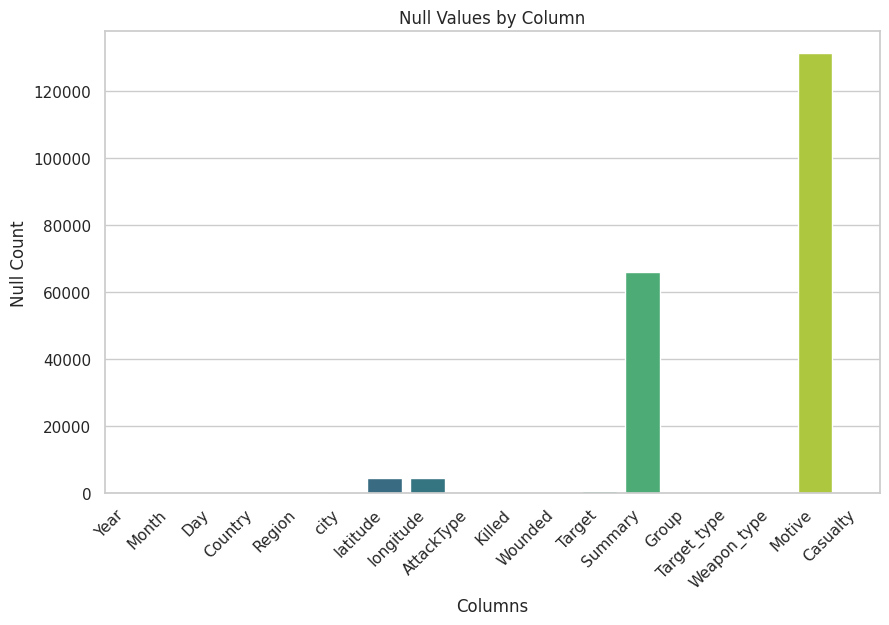

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.show()

### What did you know about your dataset?

The Global Terrorism dataset comprises information on terrorist attack happened in the year span from 1970 to 2017 , encompassing 181691 entries and 135 columns. Null values are observed in the 'latitude', 'longitude' ,'Summary'  and 'Motive' columns. Additionally, there are no duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'Casualty'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Variables Description

**The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).**

**Attribute Information** :

**Year**: Year for the respective data row

**Month**: Month for the respective data row

**Day**: Day for the respective data row

**Country**: Name of the country with

**Region**: Region of respective attack

**city**: city of respective attack

**latitude**: latitude of the location

**longitude**: longitude of the location

**AttackType**: type of the attack

**Killed**: No. of people killed in the attack

**Wounded**: No. of people wounded

**Summary**: Summary of the event

**Group**: group of the targetCasualty

**Casualty**: Total casualties of the incident

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
Casualty          345
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

<ipython-input-71-39de9c465432>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-39de9c465432>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


### What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:

1.Filled missing values of Killed with Not available.

2.Filled missing values of Wounded with Not Known.

3.Made a new column with the name Casualty by adding values of killed and wounded  

4.Also renamed a bunch of columns to make it more simple to understand what the dataset is trying to say.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
##Which region has highest terrorirst attacks?


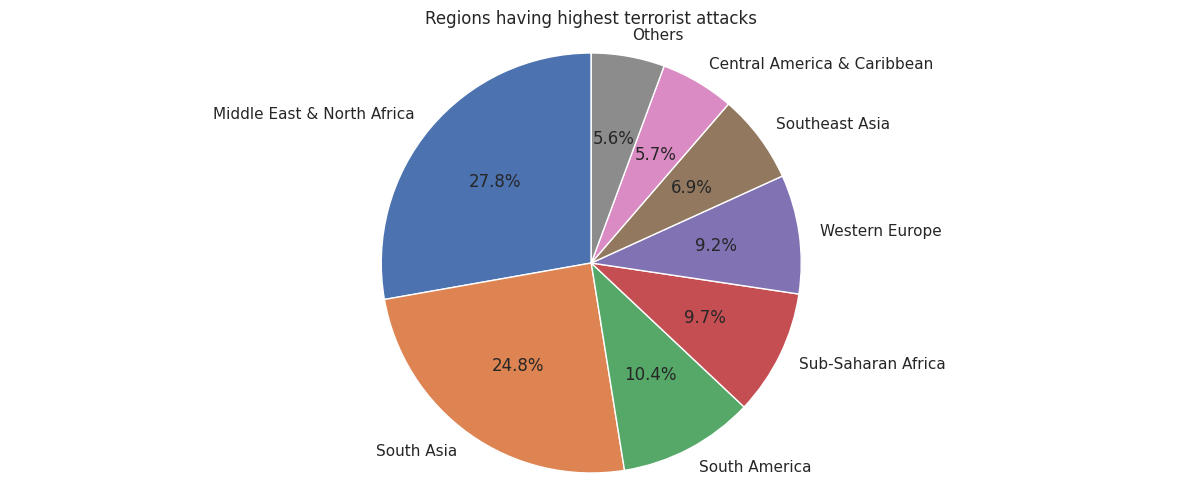

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Assuming 'df' is your DataFrame with a 'Region' column
region_counts = df['Region'].value_counts()

# Identify regions with less than 3 percent occurrence
threshold = 3
small_regions = region_counts[region_counts/region_counts.sum() < threshold/100].index

# Replace small regions with 'Others'
df['Region'] = df['Region'].replace(small_regions, 'Others')

# Recalculate counts for the modified DataFrame
region_counts = df['Region'].value_counts()

# Create a pie chart
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)

# Add labels and a title
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Regions having highest terrorist attacks')

plt.show()


##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

Middle East and North Africa region has highest number of attacks  which is 27.8 % of the total no. of attacks

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**:
Given the higher frequency of terrorist attacks in the Middle and East Africa region, there might be an increased demand for security services, both from governments and private entities. Security firms could find opportunities to provide risk assessment, surveillance, and other security-related services. Increased awareness of security concerns in the region could lead to opportunities for businesses involved in humanitarian aid and development. Organizations addressing social and economic issues may find opportunities to contribute positively to the affected communities.

**Negative business impact**:
The persistence of security concerns may have a negative impact on the local economy. Reduced economic activities, tourism, and foreign investments can hinder overall economic growth.
The prevalence of terrorist attacks might discourage some businesses from entering the market or expanding their operations in the Middle and East Africa region. Concerns about security and stability could lead to hesitancy among potential investors and businesses.

#### Chart - 2
##Which country has highest terrorirst attacks?

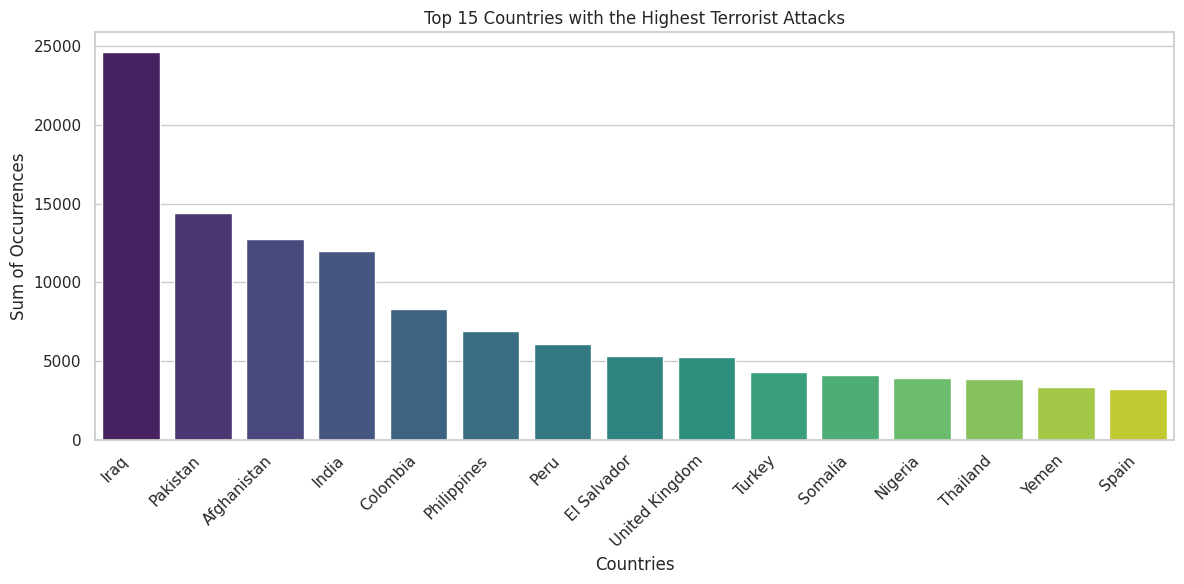

In [ ]:
# Filter the top 15 countries
top_countries = df['Country'].value_counts().nlargest(15).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df_top_countries, order=top_countries, palette='viridis')

# Add labels and a title
plt.xlabel('Countries')
plt.ylabel('Sum of Occurrences')
plt.title('Top 15 Countries with the Highest Terrorist Attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Iraq country has highest number of attacks  followed by Pakistan, Afghanistan and even India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact**:

**Security and Defense Industry Opportunities**: The prevalence of attacks in these regions may create opportunities for businesses in the security and defense industry. Companies specializing in security services, surveillance technology, and risk assessment could find a market for their products and services.

**Potential Negative Business Impact**:

**Operational and Supply Chain Disruptions**: Businesses with operations or supply chains in these countries may face disruptions due to security concerns. Transportation delays, increased security measures, and potential closures could impact the smooth functioning of businesses.

#### Chart - 3 Which is the most weapon used by terrorirsts ?

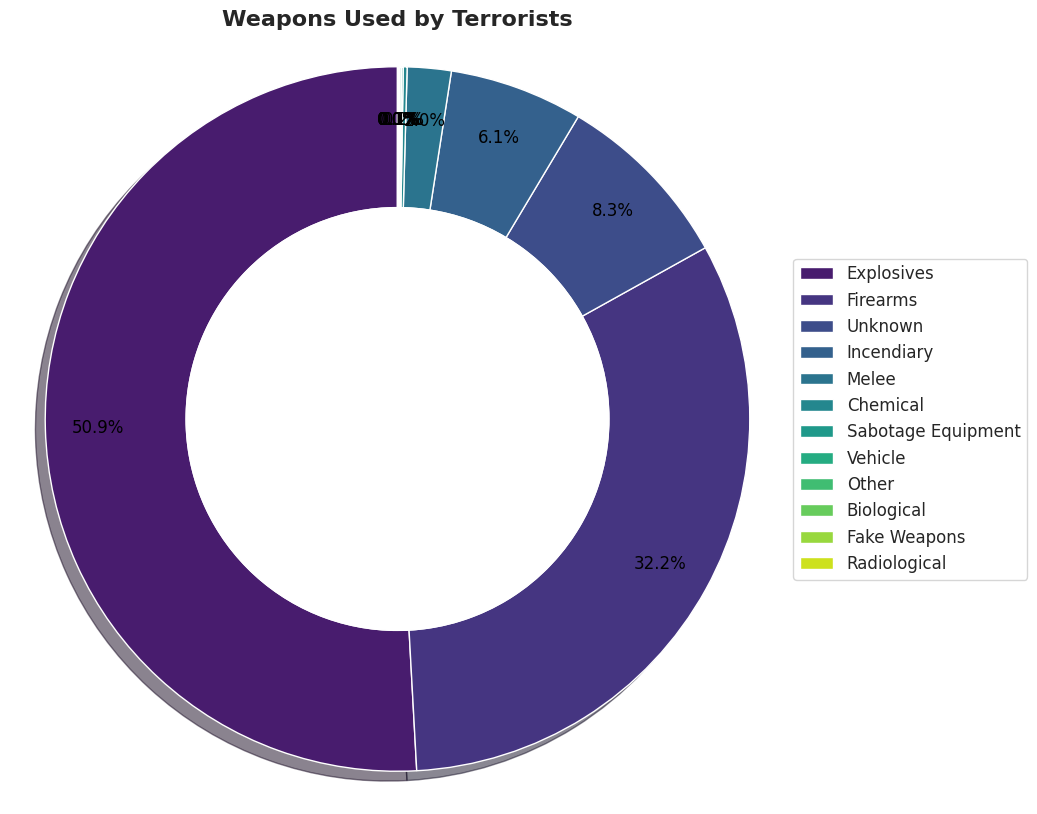

In [ ]:
plt.figure(figsize=(10, 10))
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
weapon_counts = df['Weapon_type'].value_counts()

# Plotting the donut chart without labels
colors = sns.color_palette('viridis', len(weapon_counts))
plt.pie(weapon_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='w'), textprops={'fontsize': 12, 'color': 'black'},
        shadow=True, pctdistance=0.85)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add labels on the side
plt.legend(weapon_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.axis('equal')
plt.title('Weapons Used by Terrorists', fontsize=16, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Donut charts are a variation of pie charts, and they are used for similar purposes with a few key differences. donut charts are used to compare the size or frequency of different categories or groups of data. donut charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

 Explosives are the most weapon used by terrorsits .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact**:

**Security Industry Opportunities**: The prevalence of explosives as a common weapon may create opportunities for businesses in the security industry. Companies providing explosive detection technology, security consulting, and risk management services could see increased demand.


**Potential Negative Business Impact**:

**Increased Security Costs**: Businesses, especially those operating in high-risk areas or industries, may face increased security costs. Investments in security personnel, equipment, and training to mitigate the threat of explosives could contribute to higher operational expenses.

#### Chart - 4   Number of terrorist activities occured in region with respect to year

<ipython-input-75-61954d8544bf>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



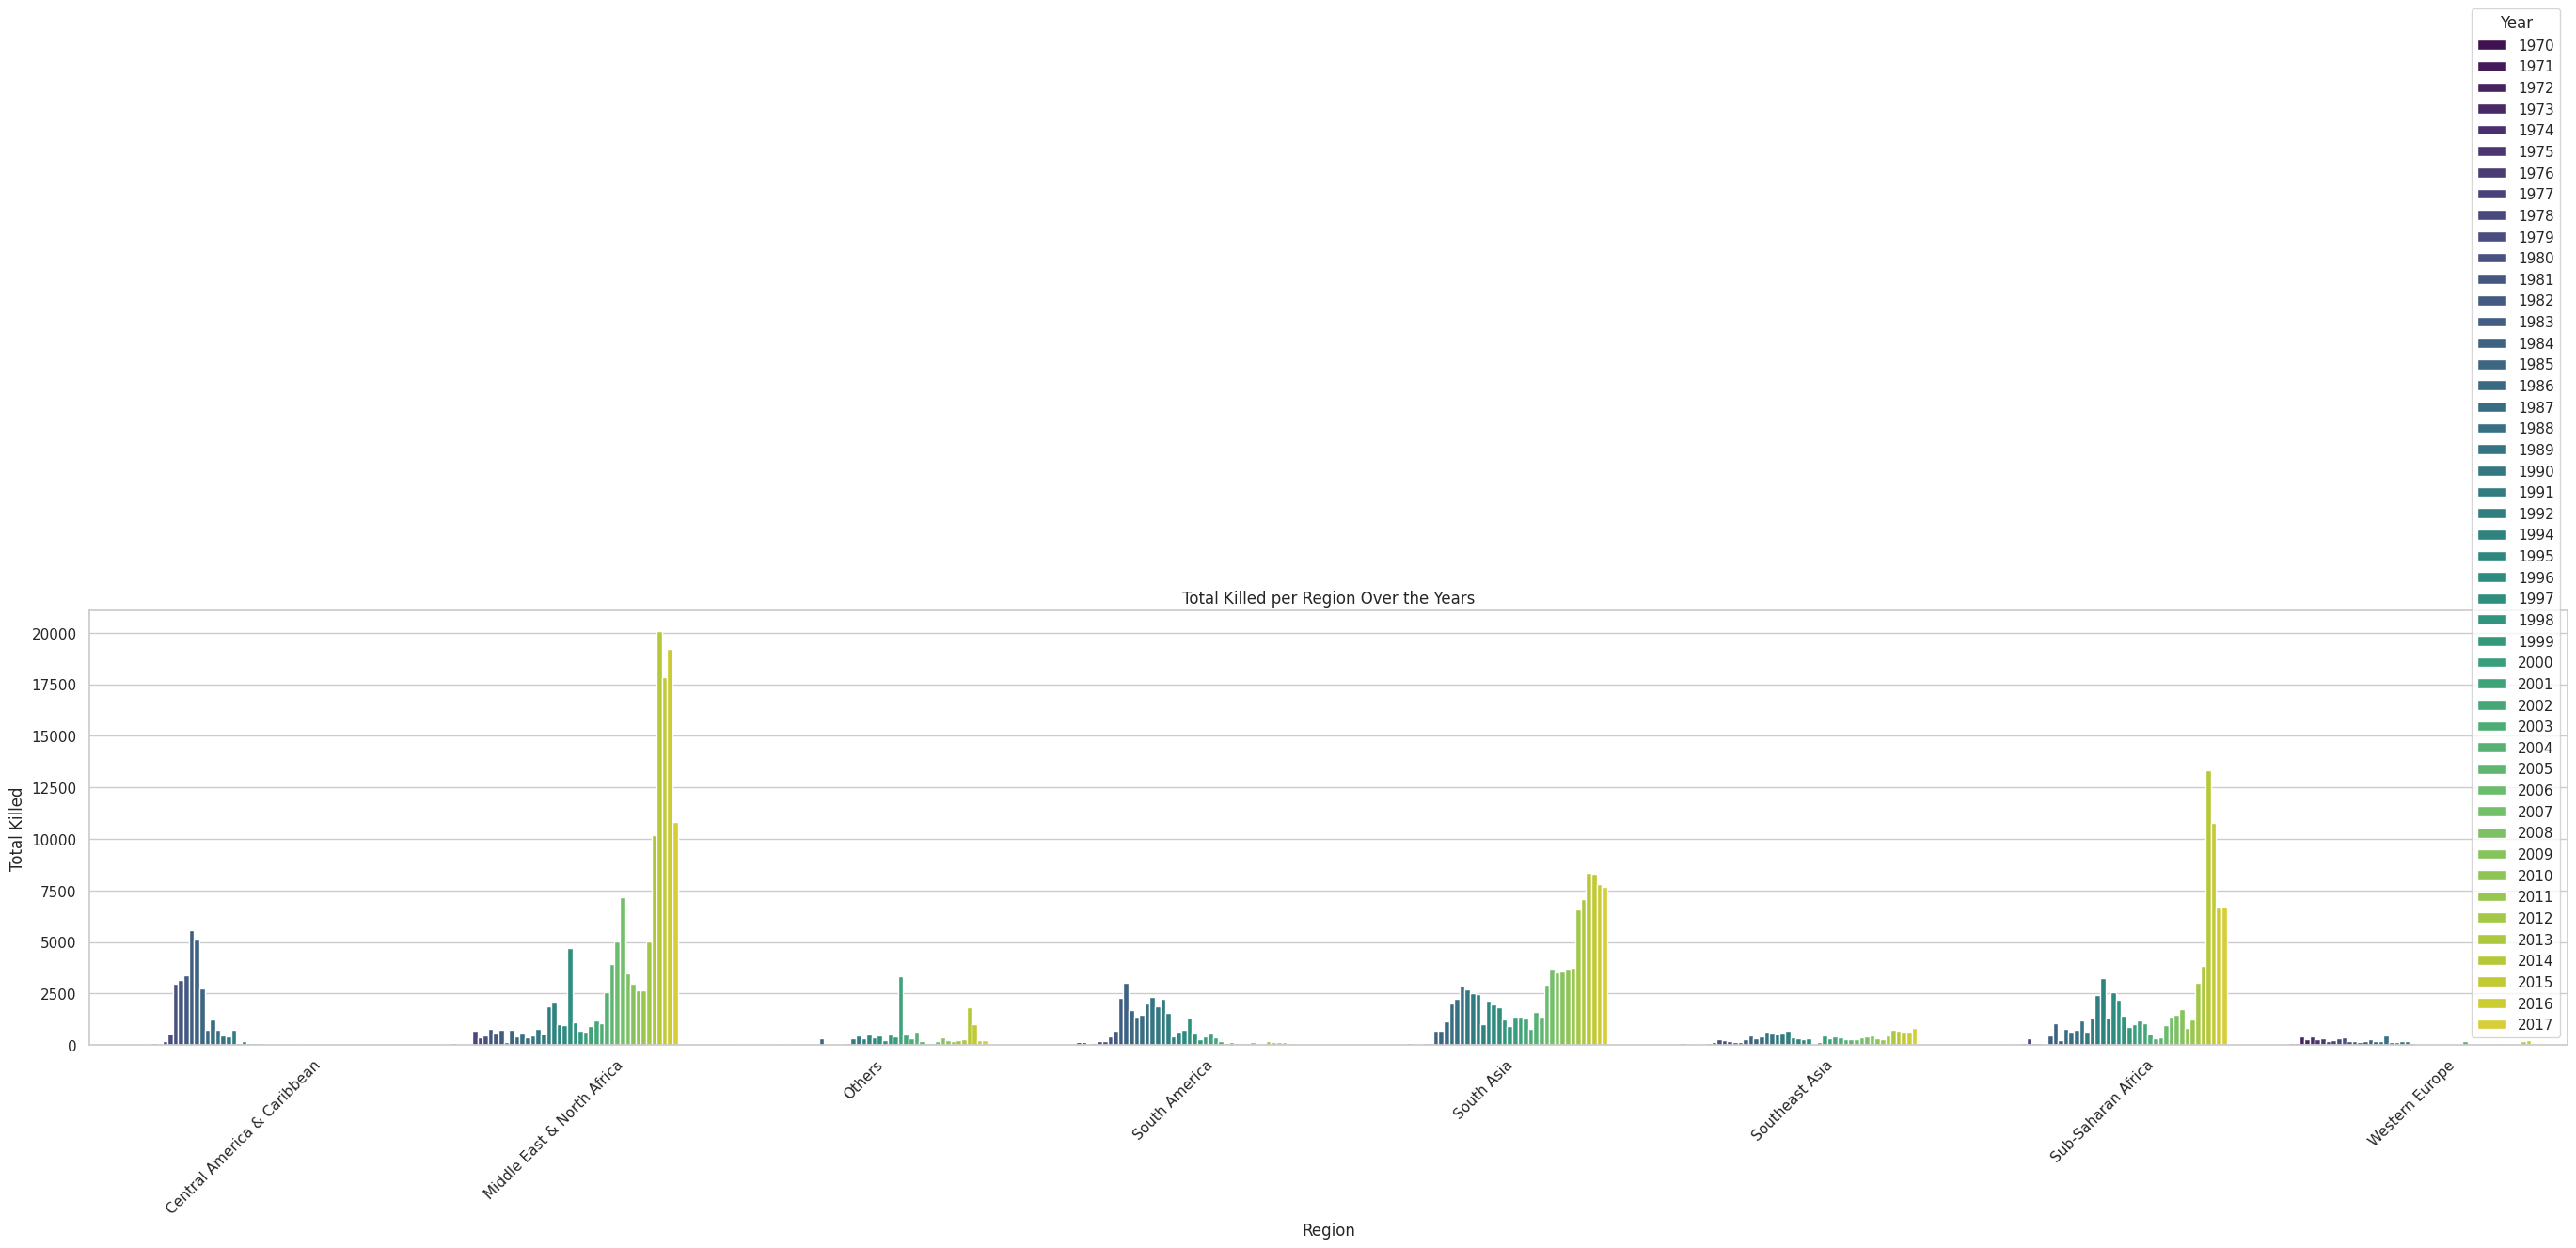

In [ ]:
# Chart - 4 visualization code
df_grouped = df.groupby(['Year', 'Region'])['Killed'].sum().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(34, 6))

# Create the animated bar plot
sns.barplot(x="Region", y="Killed", hue="Year", data=df_grouped, palette="viridis")

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Killed")
plt.title("Total Killed per Region Over the Years")

# Show the legend
plt.legend(title="Year")

# Show the plot
plt.tight_layout()
plt.show() # use a bin of 1000 or 500 .

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the analysis we can see that on 2014 the number of terrorist activities were the highest in Middle east and North Africa.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Market for Resilience Solutions**: Businesses offering resilience and continuity solutions may find a market for their services. Organizations may seek assistance in developing and implementing strategies to ensure business continuity in the face of security challenges.

**Potential Negative Business Impact:**

**Operational Disruptions:** Businesses with existing operations in the region may face operational disruptions due to security concerns. Increased security measures, transportation delays, and potential closures could impact the smooth functioning of businesses.

#### Chart - 5 Number of Terrorist activities vs Year

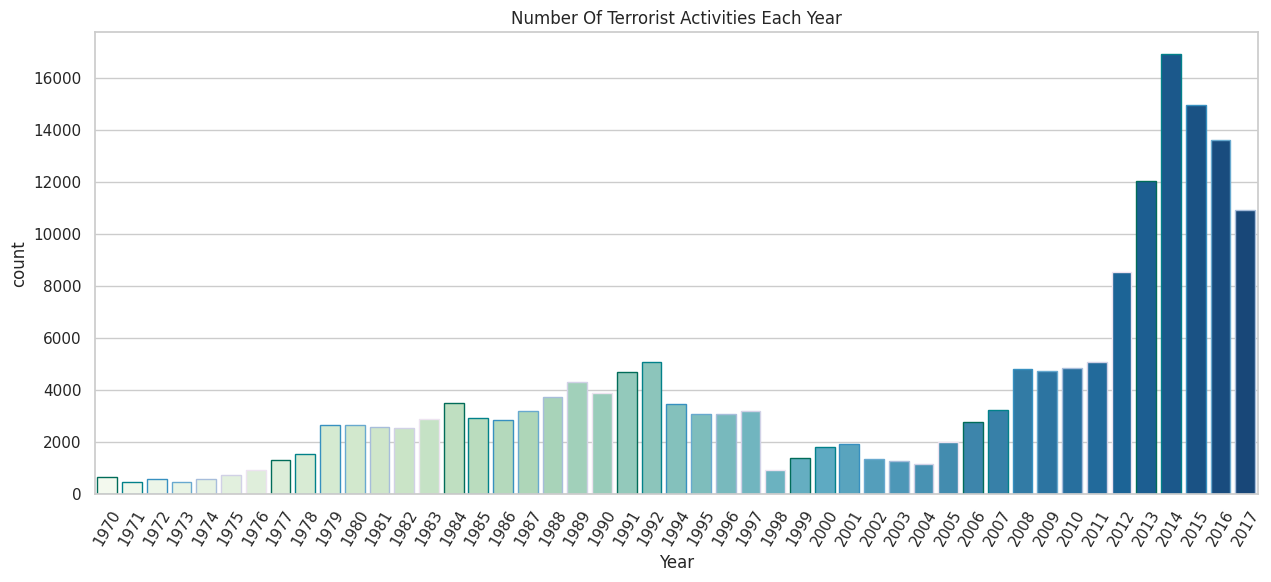

In [ ]:
# Assuming 'df' is your DataFrame with a 'Year' column
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='GnBu', edgecolor=sns.color_palette('PuBuGn_r', 7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()  #line plot or point plot


##### 1. Why did you pick the specific chart?

A countplot is a type of data visualization that is commonly used in statistical analysis and data exploration. It is specifically used to display the counts of observations in each category of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the analysis we can see that on 2014 the number of terrorist activities were the highest in the world.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Technological Innovation:** The need for advanced security measures may drive technological innovation. Businesses involved in developing cutting-edge security technologies, surveillance systems, and threat detection tools could find a global market for their products.

**Potential Negative Business Impact:**

**Impact on International Trade:** The global security situation may impact international trade, with potential restrictions and changes in trade patterns. Businesses involved in cross-border trade may face challenges related to increased scrutiny and regulatory changes.

#### Chart - 6  Who are the main targets?

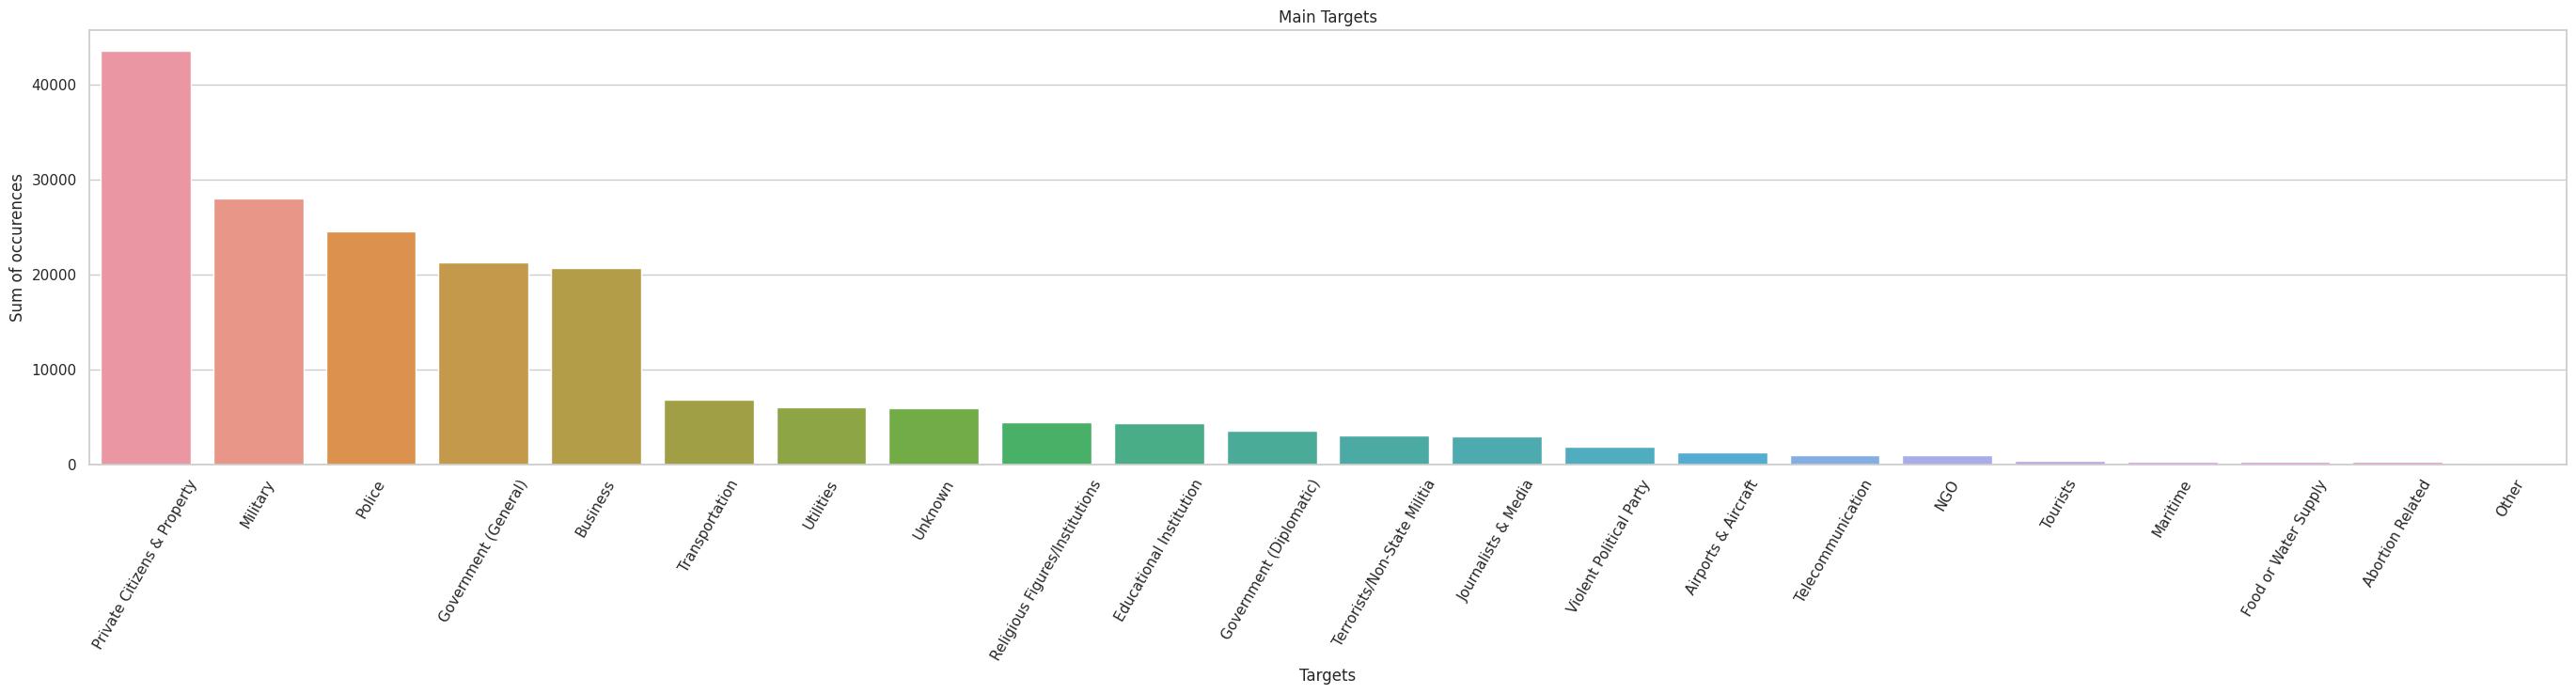

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(34,6))
sns.countplot(x='Target_type',data=df,order=df['Target_type'].value_counts().index )
plt.xlabel('Targets')
plt.ylabel('Sum of occurences')
plt.title('Main Targets')

plt.xticks(rotation = 60)# use 90 rotation
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Private citizens and property emerge as the primary targets of terrorist activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Technology and Innovation:** The need for advanced security measures may drive technological innovation. Businesses involved in developing cutting-edge security technologies, such as smart home security systems or personal safety apps, could find a market for their products.

**Insurance and Risk Management Opportunities:** The heightened awareness of threats to private citizens and property may lead to increased demand for insurance and risk management services. Insurance companies and risk assessment firms may find opportunities to provide tailored solutions to individuals and businesses.

**Potential Negative Business Impact:**

**Increased Security Costs for Businesses:** Businesses operating in sectors that are frequently targeted may face increased security costs. Investments in security infrastructure, personnel training, and risk mitigation measures to protect private citizens and property could contribute to higher operational expenses.

**Negative Impact on Tourism and Hospitality:** Regions or industries heavily dependent on tourism and hospitality may experience a decline. The perception of increased security threats to private citizens could deter travel, resulting in economic losses for businesses in these sectors.

#### Chart - 7  Hot zones of terrorism (by Country)

In [ ]:
# Chart - 7 visualization code
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'df' is your DataFrame with a 'Country' column
# Filter the data for the top 15 affected countries
top_countries = df['Country'].value_counts()[:100].index
df_top_countries = df[df['Country'].isin(top_countries)]

# Merge the world map with your data
merged_df = world.merge(df_top_countries['Country'].value_counts().reset_index(),
                        left_on='name',
                        right_on='index',
                        how='left')

# Create a choropleth map
fig = px.choropleth(merged_df,
                    locations='name',
                    locationmode='country names',
                    color='Country',
                    title='Top Affected Countries',
                    color_continuous_scale='Plasma',
                    height=600,
                    width=1000,
                    labels={'Country': 'Number of Occurrences'})

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'))

fig.show()

<ipython-input-78-905cbcd255e4>:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



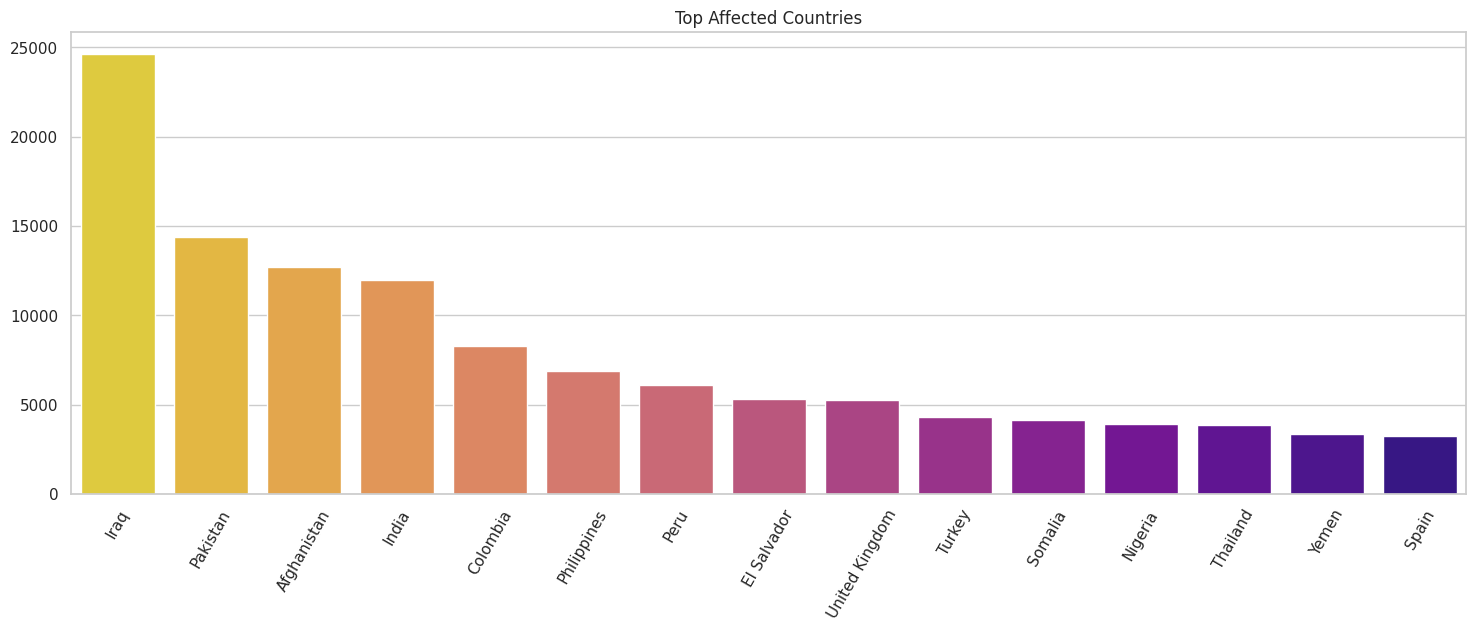

In [ ]:
plt.subplots(figsize=(18, 6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values, palette='plasma_r')
plt.title('Top Affected Countries')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability if needed
plt.show()

##### 1. Why did you pick the specific chart?

Choropleth maps are used to visualize spatial data by shading or coloring geographic regions based on the intensity of a particular variable. They are particularly useful when you want to show variations in data across different geographic areas, allowing you to identify patterns, trends, and hotspots.

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Iraq ranks highest in the number of attacks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact**:

**Security and Defense Industry Opportunities**: The prevalence of attacks in these regions may create opportunities for businesses in the security and defense industry. Companies specializing in security services, surveillance technology, and risk assessment could find a market for their products and services.

**Potential Negative Business Impact**:

**Operational and Supply Chain Disruptions**: Businesses with operations or supply chains in these countries may face disruptions due to security concerns. Transportation delays, increased security measures, and potential closures could impact the smooth functioning of businesses.

#### Chart - 8 Hot zones of terrorism (by City)

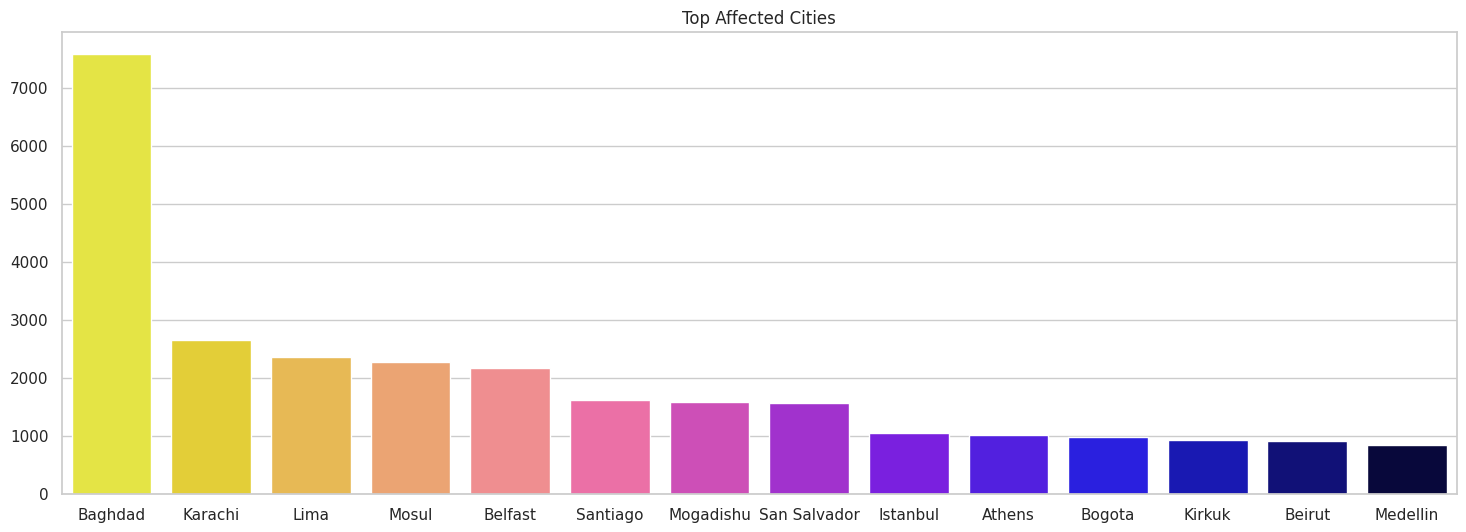

In [ ]:
# Chart - 8 visualization code
plt.subplots(figsize=(18,6))
sns.barplot(x = df['city'].value_counts()[1:15].index,y = df['city'].value_counts()[1:15].values,palette='gnuplot2_r')
plt.title('Top Affected Cities')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Baghdad is the city with the highest no. of terrorist attacks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Infrastructure Development Opportunities:** Governments and private entities in Baghdad may invest in infrastructure development to enhance security measures. Construction and engineering firms specializing in security infrastructure could find business opportunities.

**Potential Negative Business Impact:**

**Operational Disruptions:** Businesses with operations in Baghdad may face operational disruptions due to security concerns. Increased security measures, potential closures, and the need for heightened vigilance could impact the smooth functioning of businesses.

#### Chart - 9 What are the attacking methods used?

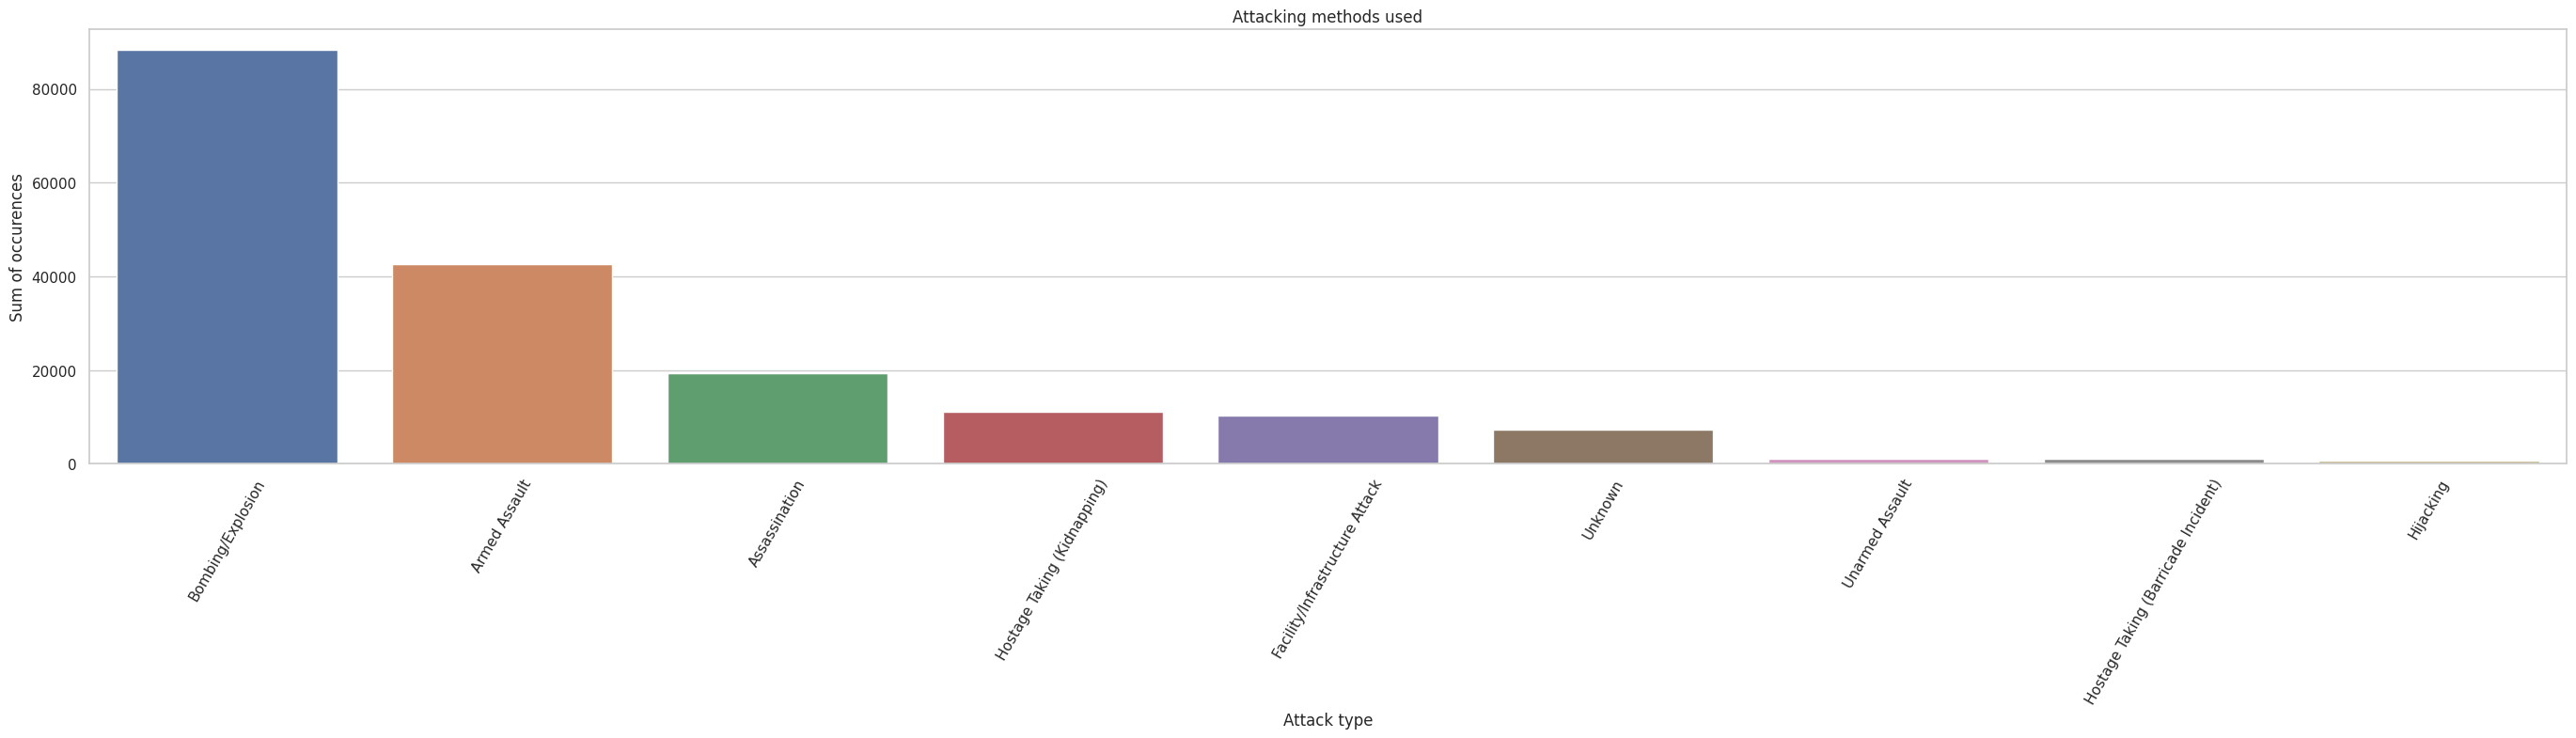

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(34,6))
sns.countplot(x='AttackType',data=df,order=df['AttackType'].value_counts().index)
plt.xlabel('Attack type')
plt.ylabel('Sum of occurences')
plt.title('Attacking methods used')

plt.xticks(rotation = 60)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Bombing and Explosion methods were most commonly used in terrorism activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Infrastructure Development Opportunities:** Governments and private entities may invest in infrastructure development to enhance security measures against bombings. Construction and engineering firms specializing in security infrastructure could find business opportunities.

**Potential Negative Business Impact:**

**Increased Security Costs:** Businesses, especially those operating in high-risk areas or industries, may face increased security costs. Investments in bomb detection technology, personnel training, and risk mitigation measures to protect against bombings and explosions could contribute to higher operational expenses.

#### Chart - 10 Attack vs Killed

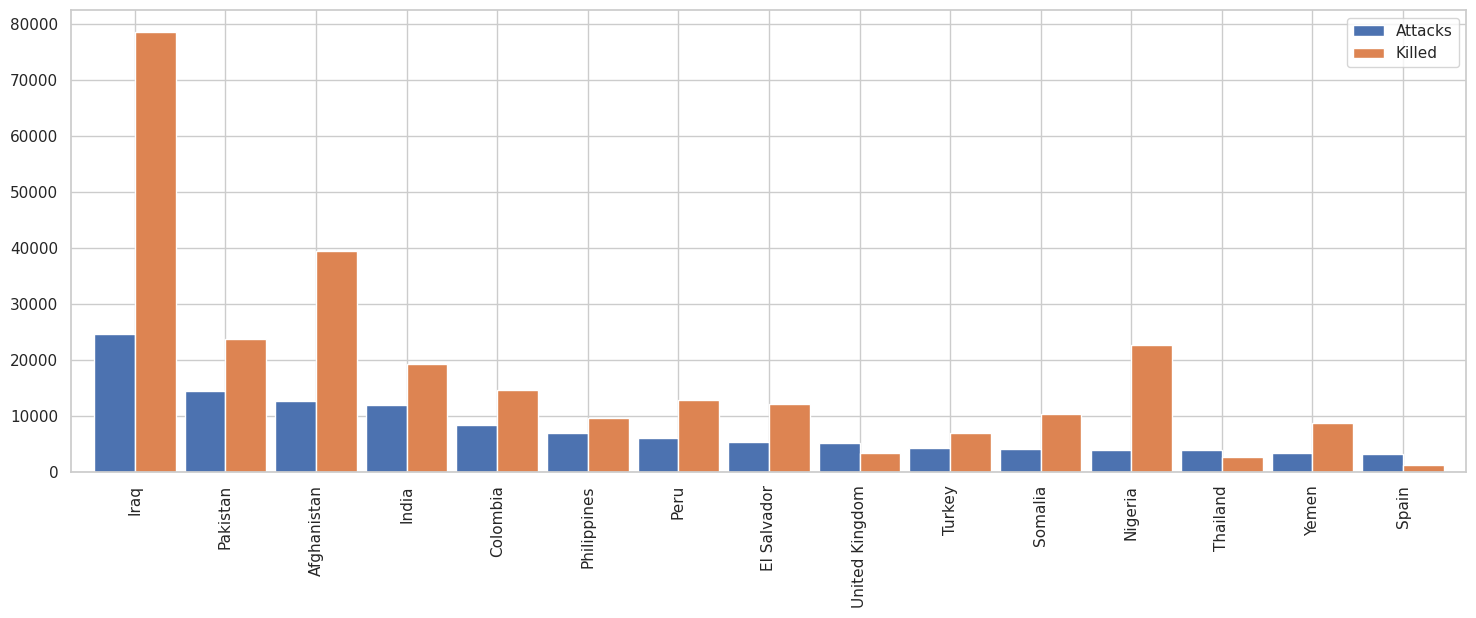

In [ ]:
# Chart - 10 visualization code
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar charts are used in data visualization for several reasons, providing a way to represent and compare multiple categories or groups across different subcategories.

##### 2. What is/are the insight(s) found from the chart?

Iraq ranks highest in the number of attacks vs killed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact**:

**Security and Defense Industry Opportunities**: The prevalence of attacks in these regions may create opportunities for businesses in the security and defense industry. Companies specializing in security services, surveillance technology, and risk assessment could find a market for their products and services.

**Potential Negative Business Impact**:

**Operational and Supply Chain Disruptions**: Businesses with operations or supply chains in these countries may face disruptions due to security concerns. Transportation delays, increased security measures, and potential closures could impact the smooth functioning of businesses.

#### Chart - 11 Most Notorious Groups

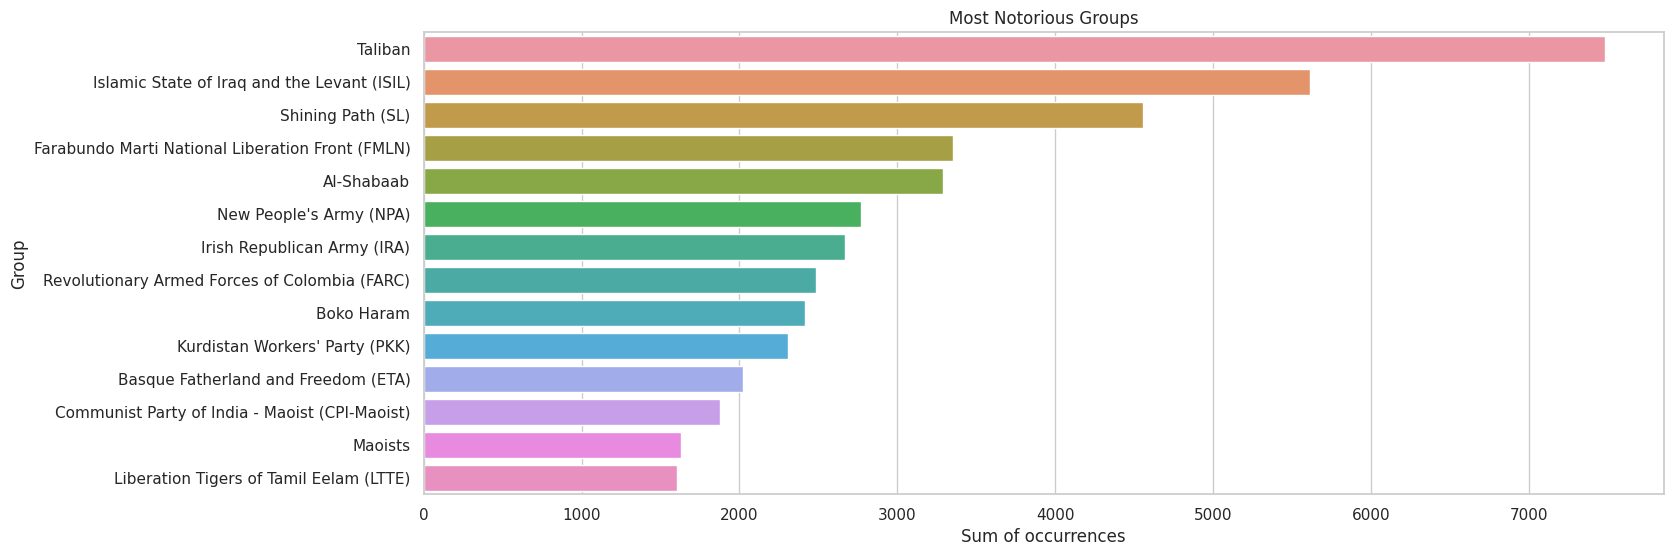

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Group'].value_counts()[1:15].values, y=df['Group'].value_counts()[1:15].index, orient='horizontal')
plt.xlabel('Sum of occurrences')
plt.ylabel('Group')
plt.title('Most Notorious Groups')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

Taliban is most Notorious group with highest number of terrorist activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Increased Demand for Security Services:** The prominence of the Taliban as a notorious group may lead to an increased demand for security services. Businesses in the security industry, offering services such as risk assessment, threat analysis, and crisis management, could find growth opportunities.

**Potential Negative Business Impact:**

**Operational Disruptions in High-Risk Regions:** Businesses operating in regions where the Taliban is active may face operational disruptions. Security concerns, potential closures, and the need for heightened vigilance could impact the smooth functioning of businesses in these areas.

#### Chart - 12 Activity of Top Terrorist Groups

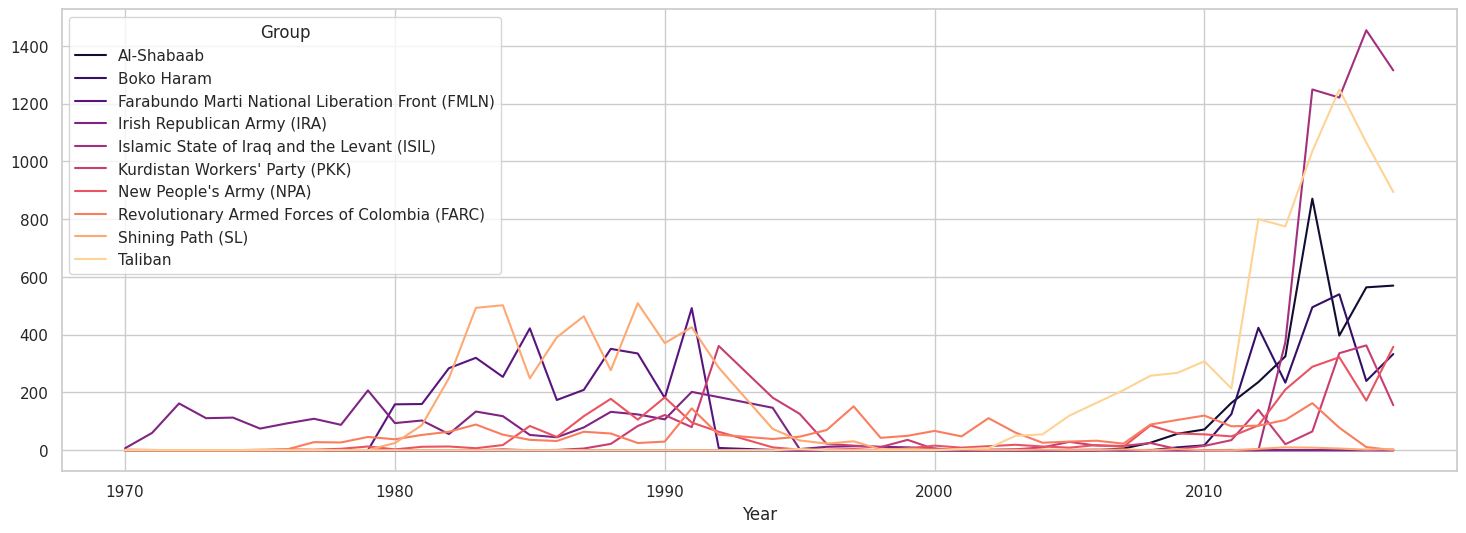

In [ ]:
# Chart - 12 visualization code
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

##### 1. Why did you pick the specific chart?

Stacked area charts are used to visualize the composition of a whole over time or across different categories. They are particularly useful when you want to show the changing proportions of multiple components within a total while highlighting their individual contributions.

##### 2. What is/are the insight(s) found from the chart?

Taliban is most Notorious group with highest number of terrorist activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**Increased Demand for Security Services:** The prominence of the Taliban as a notorious group may lead to an increased demand for security services. Businesses in the security industry, offering services such as risk assessment, threat analysis, and crisis management, could find growth opportunities.

**Potential Negative Business Impact:**

**Operational Disruptions in High-Risk Regions:** Businesses operating in regions where the Taliban is active may face operational disruptions. Security concerns, potential closures, and the need for heightened vigilance could impact the smooth functioning of businesses in these areas.

#### Chart - 13 - Correlation Heatmap

<ipython-input-85-cd6dfddbe2da>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



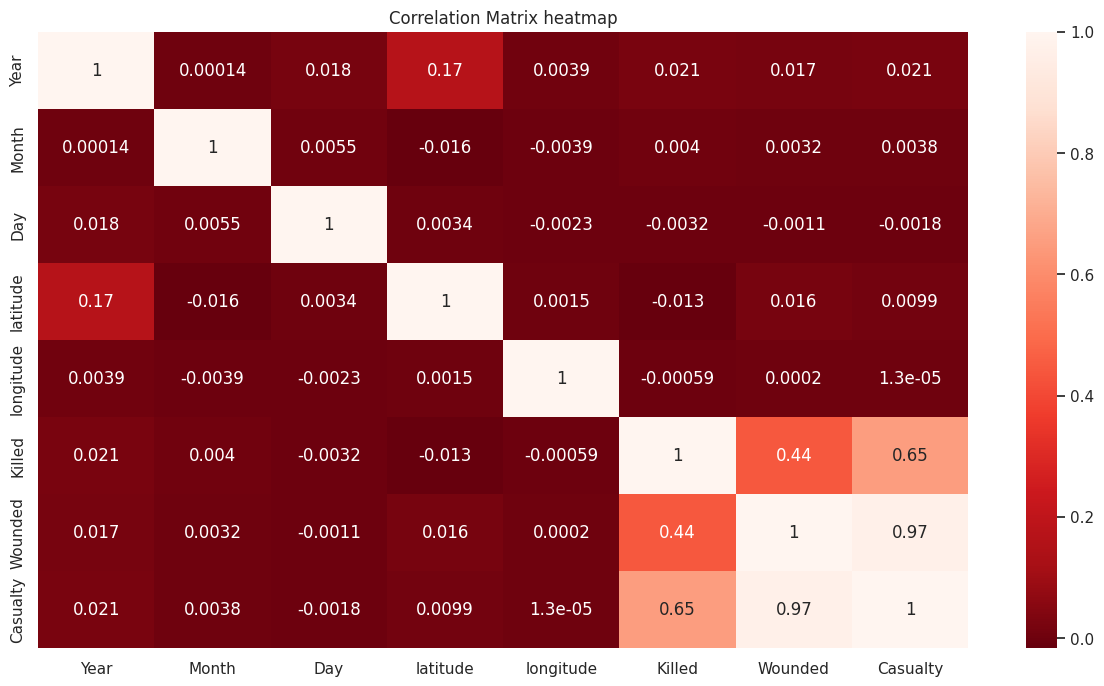

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Since correlation matrix gets you the correlation between two columns and their this particular heat map shows that there is a lot of correlation between Killed, Wounded and the Casualty of these terrorist attacks. The correlation value of wounded and casualty is more hence there were more wounded then killed but the correlation value of people killed and the total casualties is 0.65 which is quiet high which should be taken care off .

#### Chart - 14 - Pair Plot

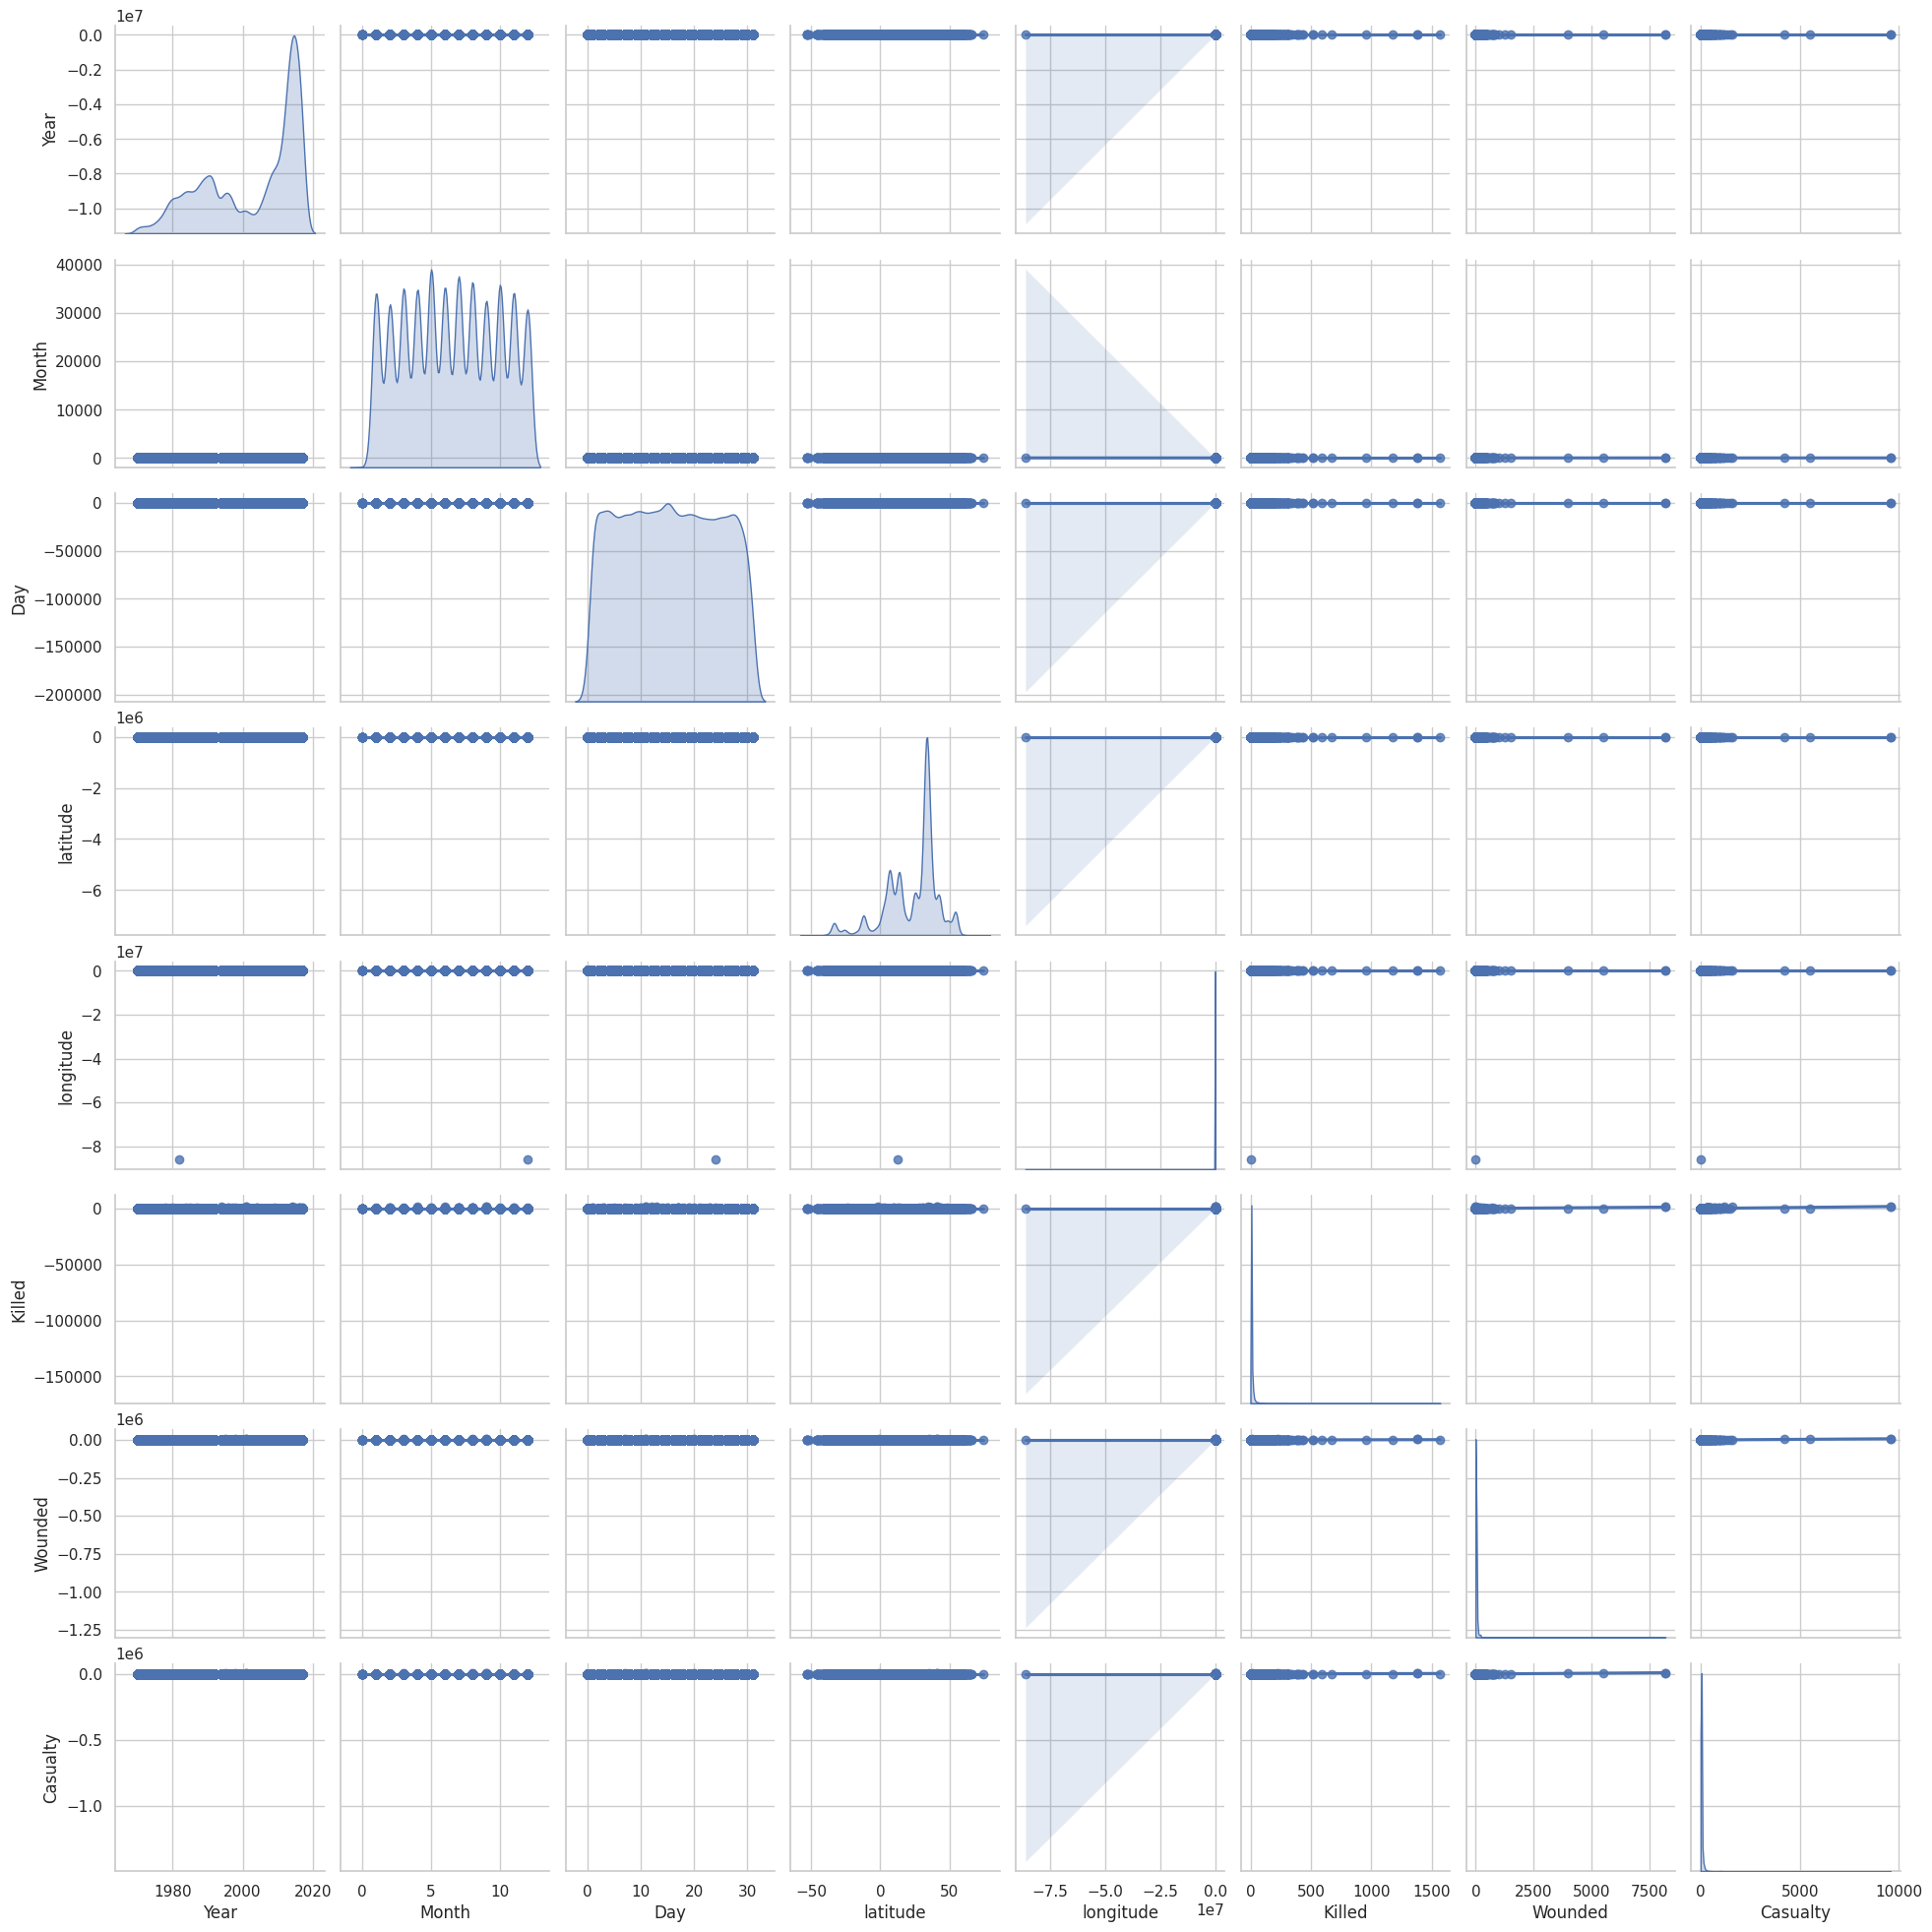

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Pair plot brings no major insights in the EDA of global terrorism dataset.Hence it is not needed in this situation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Given the analysis and my role as a security and defense analyst, here are some suggestions for achieving the business objectives:

**Enhance Regional Security Measures**:

Focus on implementing and enhancing security measures in regions identified as having a high incidence of terrorism, particularly in the Middle and East Africa region.
Collaborate with local authorities and international partners to strengthen security infrastructure and intelligence-sharing.

**Improve Intelligence Gathering:**

Invest in intelligence gathering and analysis capabilities to stay ahead of evolving terrorist tactics.
Utilize advanced data analytics, machine learning, and AI tools to identify patterns, trends, and potential threats.

**Counter Explosive Threats:**

Given that explosives are the predominant weapon used by terrorists, prioritize efforts to counter explosive threats.
Develop and implement strategies for detecting, preventing, and mitigating explosive incidents, including the deployment of advanced screening technologies.

**Yearly Threat Assessments:**

Conduct yearly threat assessments to keep abreast of changes in terrorist activities.
Use historical data to predict potential hotspots and allocate resources accordingly.

**Targeted Counterterrorism Policies:**

Tailor counterterrorism policies to protect private citizens and property, the primary targets identified in the analysis.
Consider community engagement initiatives to build trust and cooperation with local populations.


**Focus on Specific Terrorist Groups:**

Given that the Taliban is identified as the most notorious group, focus efforts on understanding and countering their activities.
Collaborate with international partners to share intelligence and coordinate efforts against such prominent groups.

**Training and Capacity Building:**

Invest in training programs and capacity building for local security forces to enhance their ability to respond effectively to terrorist threats.

**Communication and Public Awareness:**

Develop communication strategies to inform the public about potential threats and encourage vigilance.
Establish channels for reporting suspicious activities and provide guidance on personal safety.

**Continuous EDA and Adaptive Strategies:**

Continue using Exploratory Data Analysis (EDA) to extract valuable insights.
Develop adaptive strategies based on real-time analysis and regularly reassess the effectiveness of implemented measures.

**Global Collaboration:**

Engage in global collaborations and information-sharing networks to strengthen the collective response to terrorism.
Stay informed about international efforts and contribute to a unified approach against terrorism.
Remember, these suggestions are broad and should be adapted to the specific context and nuances of each region. Regularly reassessing the situation and adjusting strategies accordingly will be crucial for success.

# **Conclusion**

In summary, we've explored different forms of analysis and engaged in question-and-answer sessions with a dataset that piqued my interest. I'd like to highlight something valuable I've discovered. When we merely glance at a dataset, all we can discern is the column information and its contents. Therefore, Exploratory Data Analysis (EDA) proves to be an incredibly effective method to simplify our tasks. Thanks to Python libraries such as pandas, numpy, matplotlib, seaborn, and plotly, we're equipped to draw conclusions, perform calculations, and create visualizations, greatly enhancing our analytical capabilities.


Based on the preceding analysis, we can draw the following conclusions:
* Iraq ranks highest in the number of attacks.
* The Middle and East Africa region experiences the highest number of attacks.
* The predominant weapon employed by terrorists is explosives.
* Within the analysis, it is evident that in 2014, Iraq witnessed the highest level of terrorist activities.
* Private citizens and property emerge as the primary targets of terrorist activities.
* The most prevalent methods in terrorism activities involve bombing and explosions.
* The Taliban stands out as the most notorious group, having been involved in the highest number of terrorist activities.

***Robust security measures should be provided to countries such as Iraq, Pakistan, Afghanistan, and India, as well as to regions in the Middle East and cities like Baghdad, Karachi, Lima, and numerous others.***

***Precautions must be taken concerning explosive devices, as bombings and explosions are the most frequently utilized weapons by terrorists.***

***Effective security should be extended to safeguard private citizens, property, the military, police, and other entities, as they represent the primary targets of terrorism.***

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***